### Import the neccessary modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset into a dataframe..

df = pd.read_csv("C:/Users/PC/Gradient Boosting/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

###  EDA

In [4]:
# View the dataset properties

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Check null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
female,891.0,0.352413,0.477990,0.00,0.0000,0.000000,1.0,1.0000
male,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
C,891.0,0.188552,0.391372,0.00,0.0000,0.000000,0.0,1.0000


In [5]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

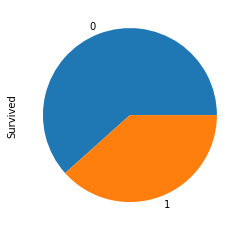

In [38]:
df.Survived.value_counts().plot.pie()

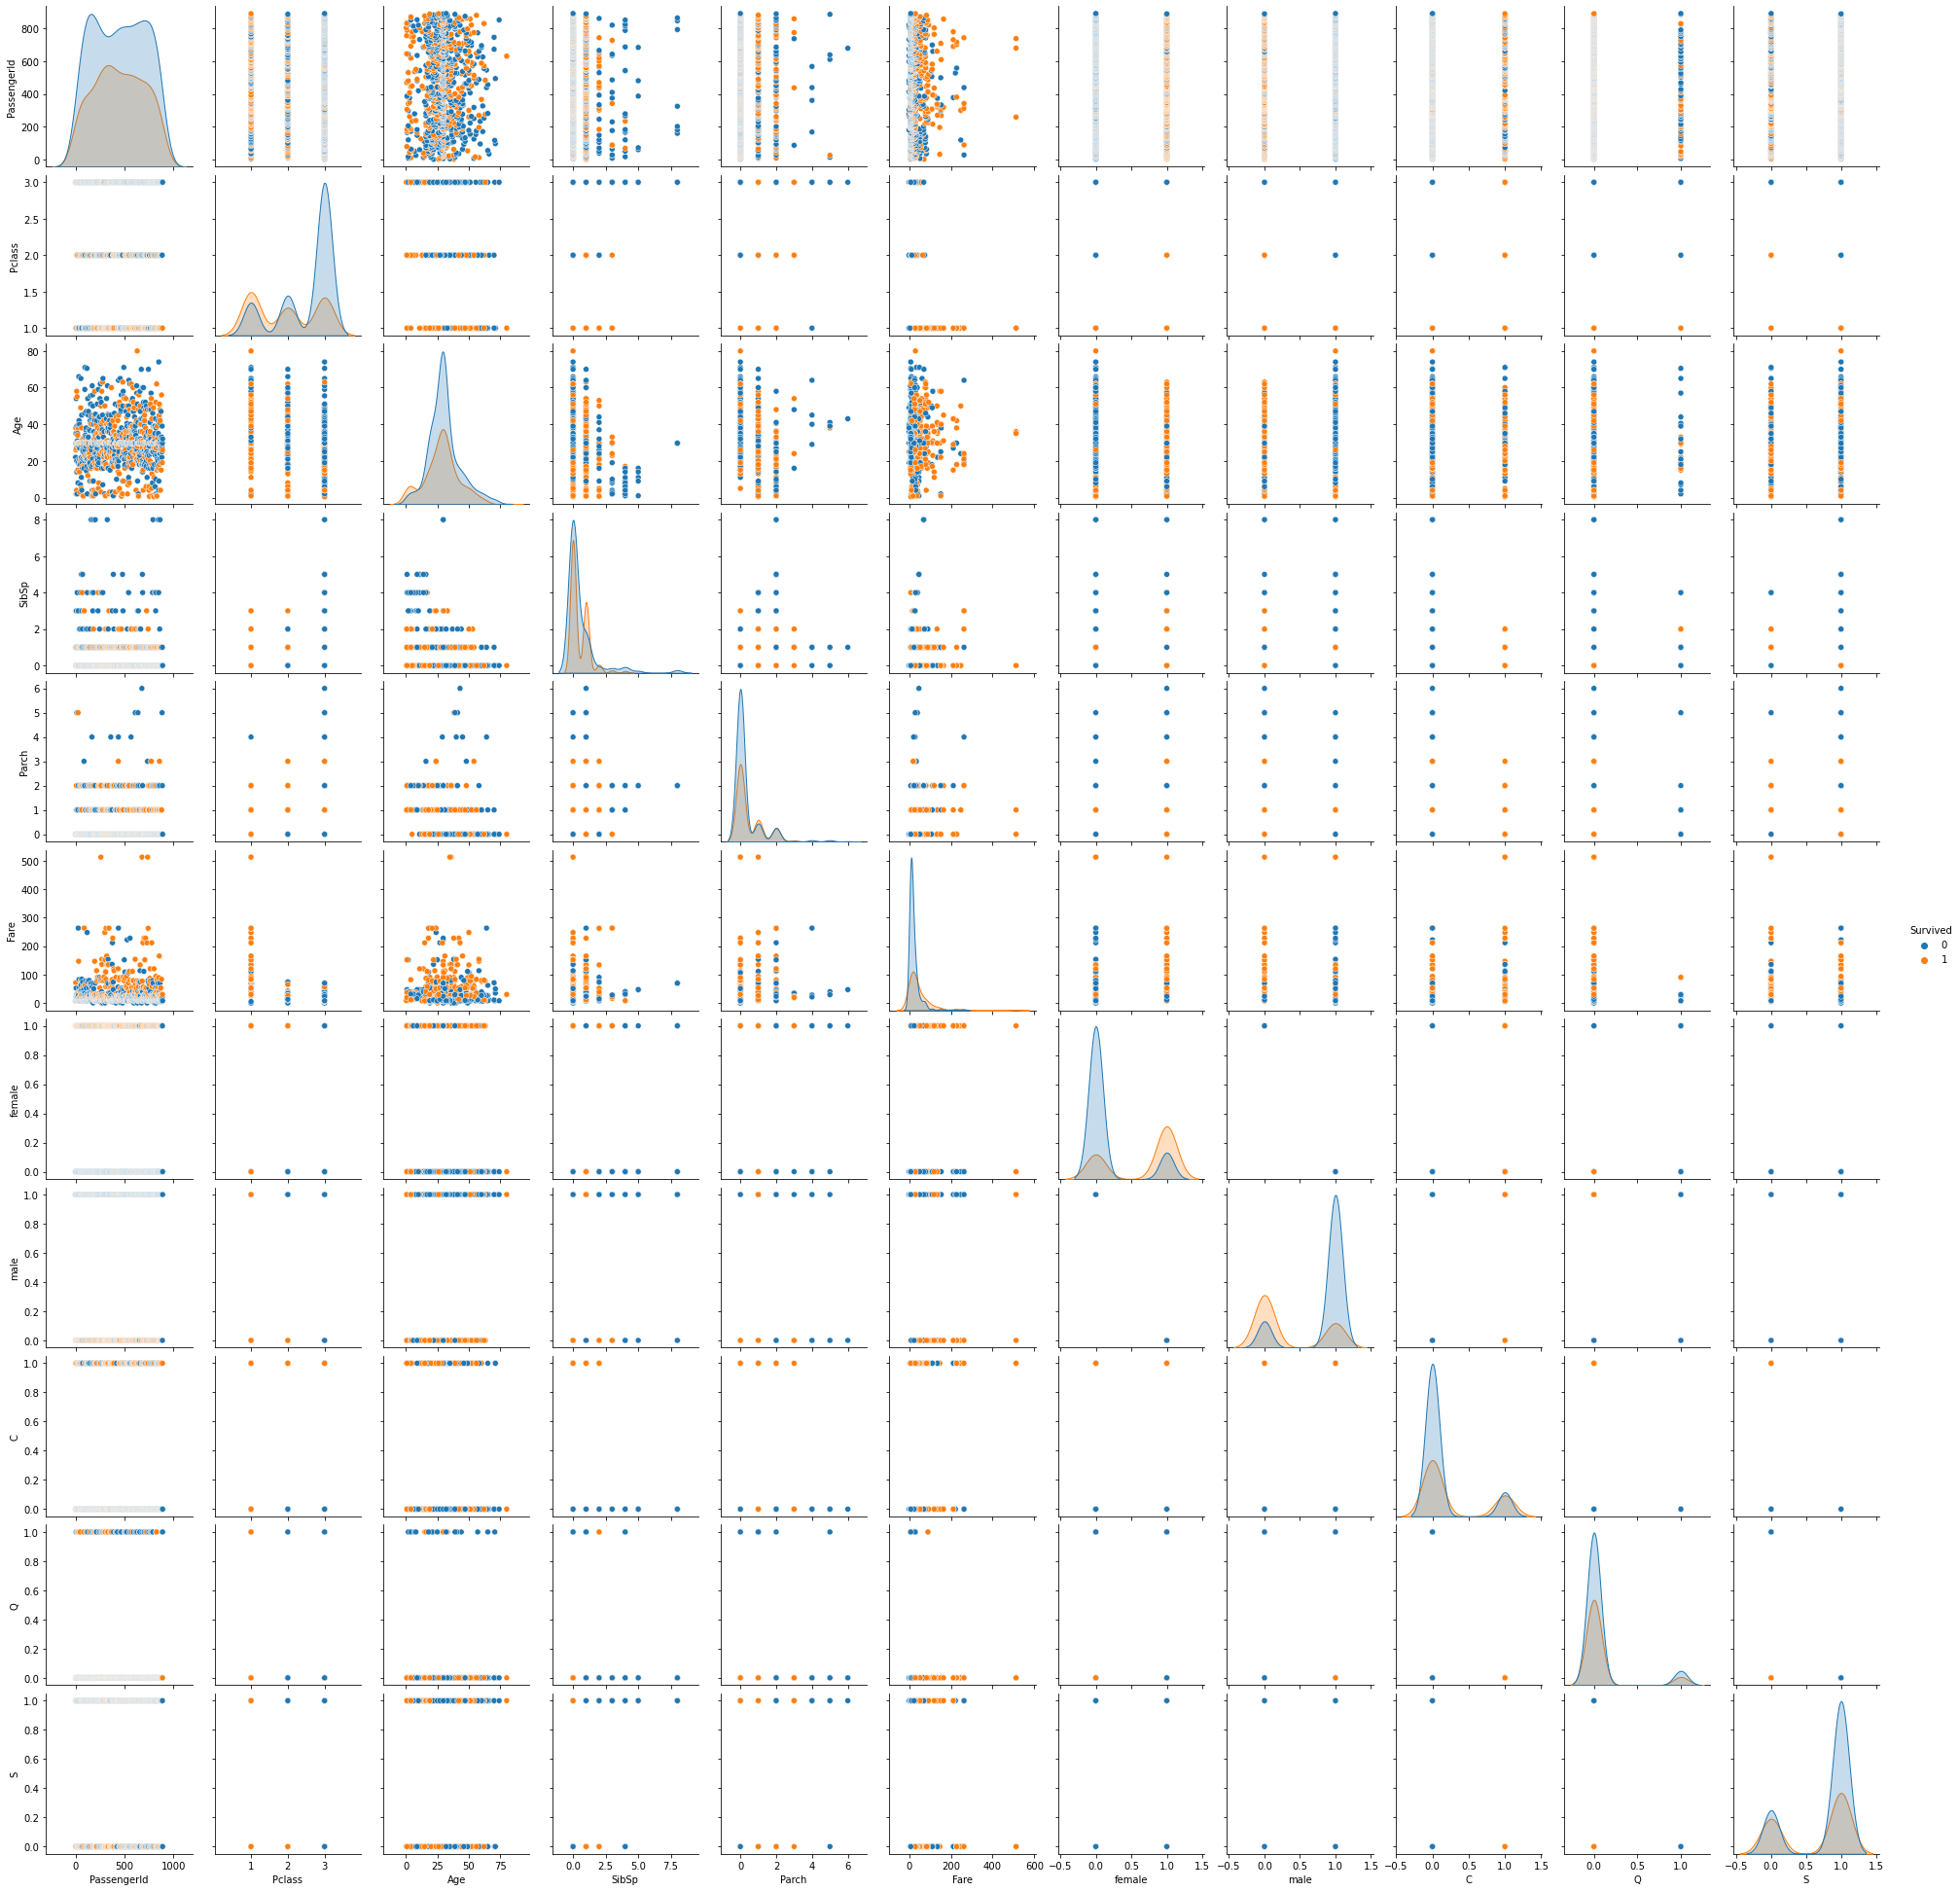

In [49]:
sns.pairplot(df,hue='Survived')

<AxesSubplot:>

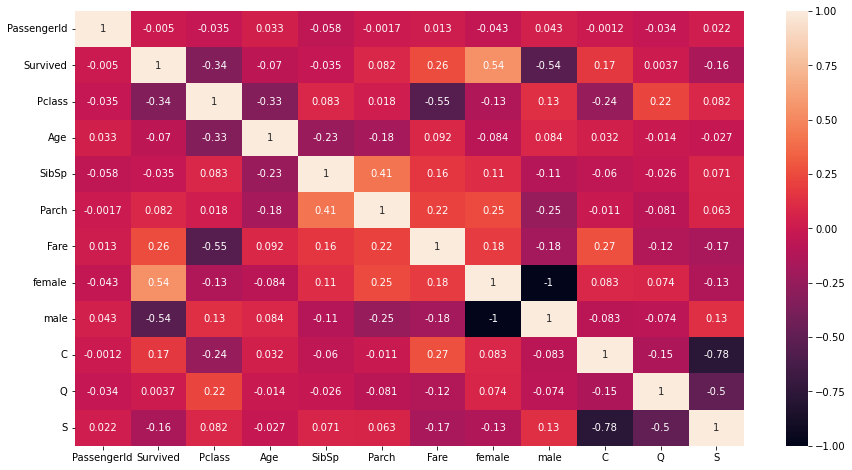

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

. Passenger class is mildly negatively correlated with Passenger Fare (-0.55) and Age(-0.37)

### Data Preprocessing 

###### We will see that Sex and Embarked  columns are not numeric. 

In [6]:
# Drop some columns which is not relevant to the analysis

cols_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols_to_drop, axis=1)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

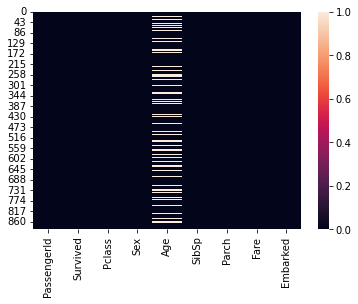

In [9]:
sns.heatmap(df.isnull())

In [10]:
# Replace missing values

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [12]:
# Drop records with missing values

df.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [13]:
# Convert categorical values to numeric
# First create dummy variables from the categorical columns

sex_col_dummy = pd.get_dummies(df['Sex'])
embarked_col_dummy = pd.get_dummies(df['Embarked'])

In [14]:
# Now we add these dummy columns to the original dataset

df = pd.concat((df, sex_col_dummy, embarked_col_dummy), axis=1 )

In [15]:
# Drop the original categorical columns

df = df.drop(['Sex', 'Embarked'], axis=1)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Separate the dataframe into X & Y 

In [17]:
x = df.drop('Survived', axis=1)
y = df['Survived']

### Splitting the dataset into train & test 

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

### Modelling - Gradient Boosting with default parameter

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

### Prediction over x_train & x_test 

In [20]:
y_pred_train = gb_model.predict(x_train)
y_pred_test = gb_model.predict(x_test)

### Evaluation 

In [21]:
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.913322632423756
Test Accuracy: 0.8022388059701493


C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


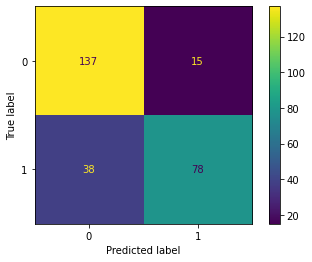

In [22]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(gb_model, x_test, y_test))

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       152
           1       0.84      0.67      0.75       116

    accuracy                           0.80       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.80      0.80       268



In [24]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(gb_model,x,y,cv=5)
print("Cross Validation Score:", score.mean())

Cross Validation Score: 0.7813319942250958


### Tune the classifier 

In [25]:
from sklearn.model_selection import GridSearchCV
estimator = GradientBoostingClassifier()
param_grid = {"n_estimators":list(range(1,96))}
grid = GridSearchCV(estimator, param_grid, cv=5, scoring="accuracy")
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [26]:
grid.best_params_

{'n_estimators': 70}

In [27]:
predictions = grid.predict(x_test)

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       152
           1       0.84      0.66      0.74       116

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268



### Final Model 

In [29]:
final_model = GradientBoostingClassifier(n_estimators=55)
final_model.fit(x_train, y_train)
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)

print("Train Accuracy:", accuracy_score(y_train, pred_train))
print("Test Accuracy:", accuracy_score(y_test, pred_test))

Train Accuracy: 0.8812199036918138
Test Accuracy: 0.8097014925373134


### Feature Importance 

In [30]:
final_model.feature_importances_

array([0.04457485, 0.15634384, 0.12129336, 0.05608194, 0.00669008,
       0.12042206, 0.165603  , 0.29903042, 0.00452047, 0.00146033,
       0.02397965])

In [31]:
imp_ft = pd.DataFrame(index=x.columns,data=final_model.feature_importances_, columns=["Feature Importance"])

In [32]:
imp_ft[imp_ft["Feature Importance"]>0]

,Feature Importance
PassengerId,0.044575
Pclass,0.156344
Age,0.121293
SibSp,0.056082
Parch,0.006690
Fare,0.120422
female,0.165603
male,0.299030
C,0.004520
Q,0.001460


In [33]:
imp_ft.sort_values("Feature Importance")

,Feature Importance
Q,0.001460
C,0.004520
Parch,0.006690
S,0.023980
PassengerId,0.044575
SibSp,0.056082
Fare,0.120422
Age,0.121293
Pclass,0.156344
female,0.165603


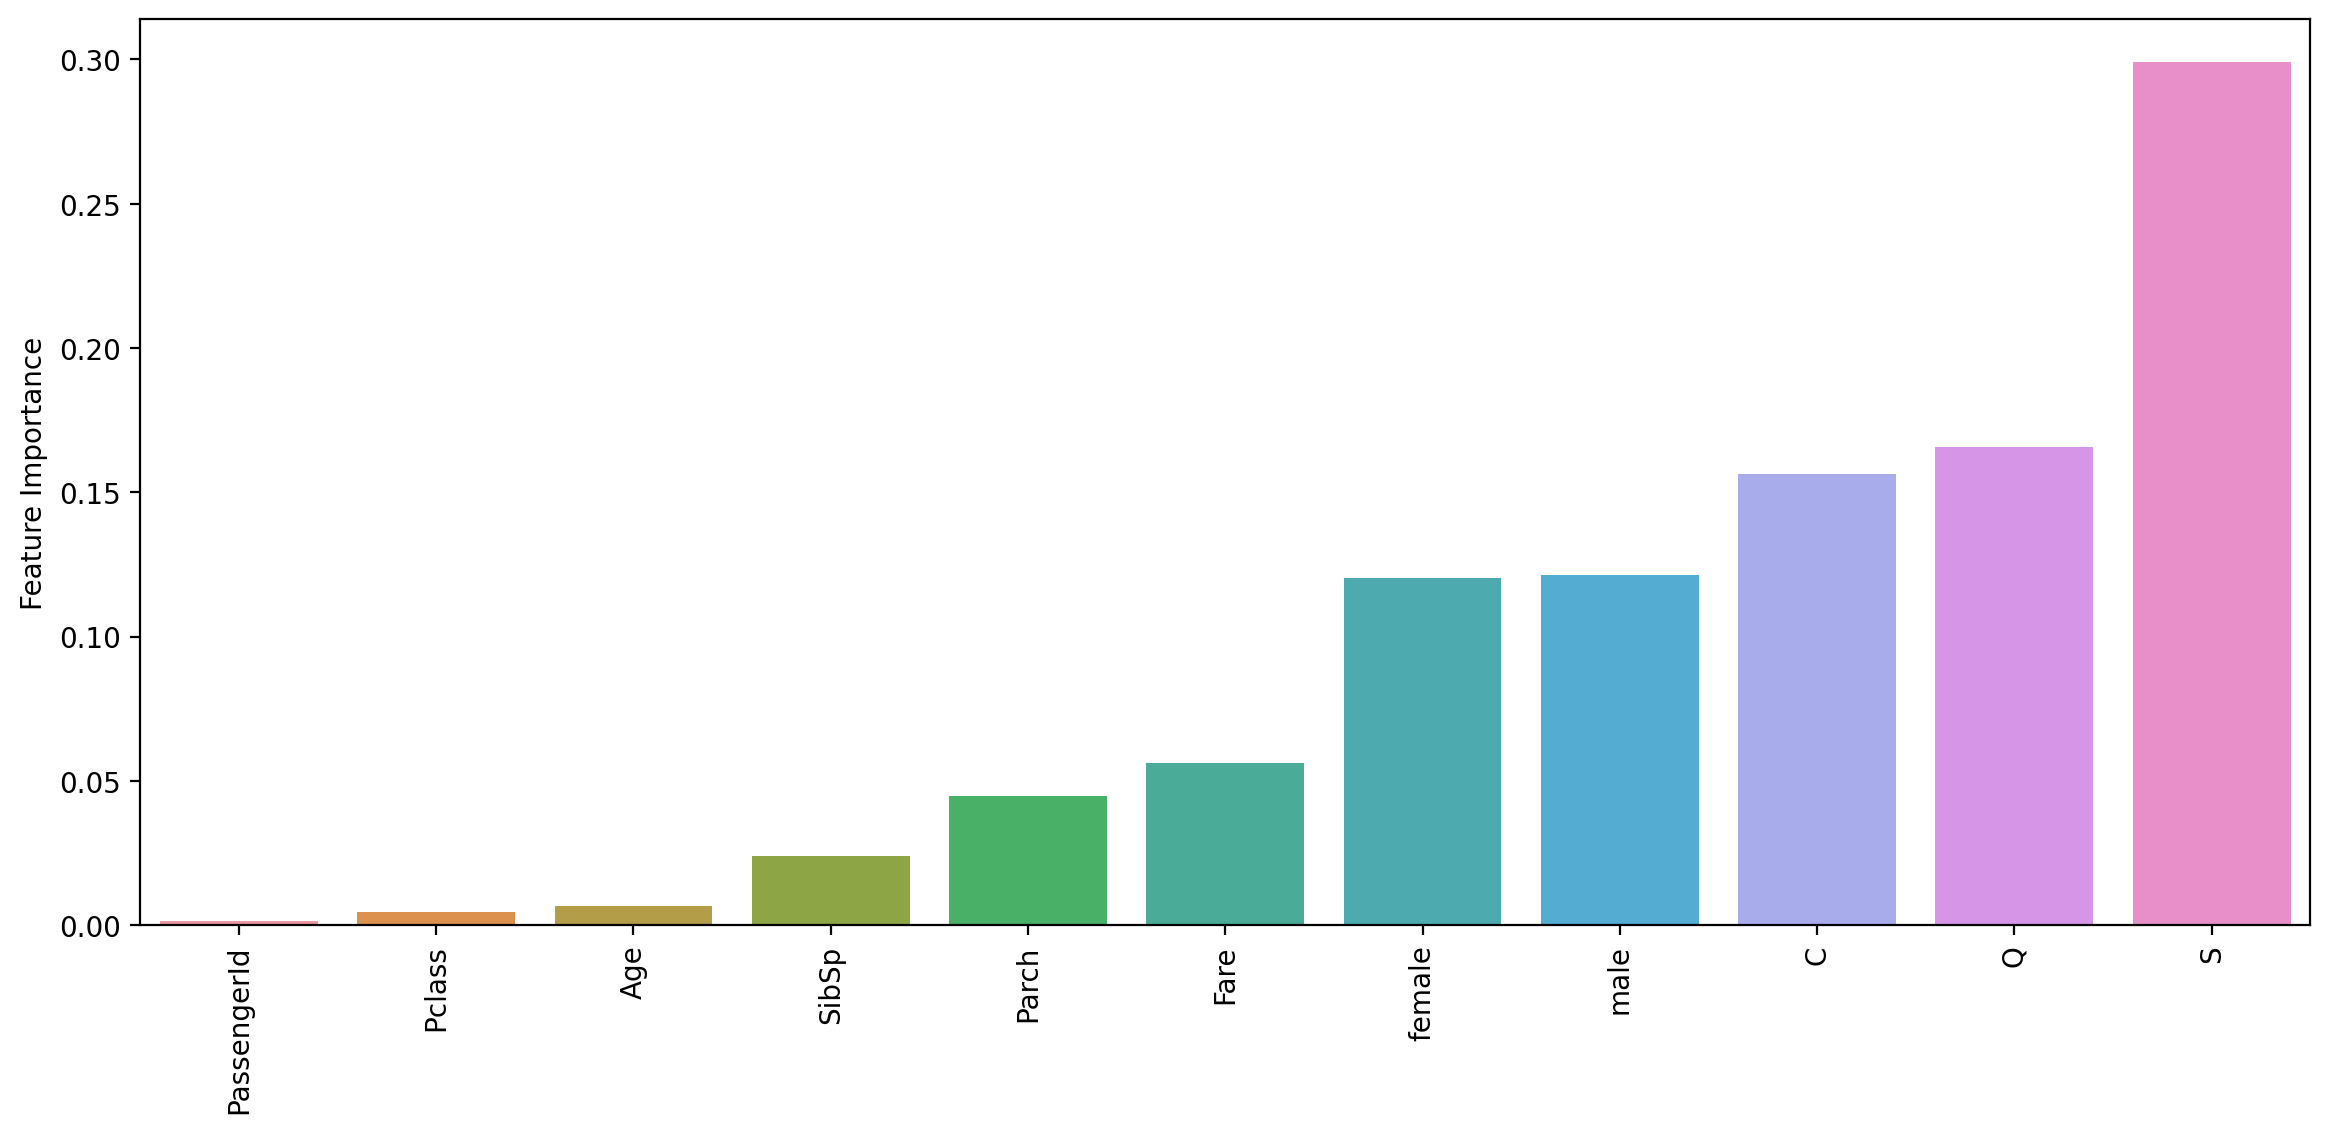

In [34]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_ft.sort_values("Feature Importance"), x=imp_ft.index, y="Feature Importance")
plt.xticks(rotation=90)
plt.show()

### Save Model 

In [35]:
import pickle
filename = "GB.pkl"
pickle.dump(final_model, open(filename, 'wb'))